# Using Fourier Transform to increase the spatial resolution
## I have showed how to use bilinear interpolation of pixel values to resample the pixel size of an image. Here I will show how to resample the pixel size using the sampling theory in Fourier Transforms.

In [1]:
import pyfits
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, fftshift, ifft2, ifftshift

## Load the target (suppose for the sake of simplicity that it's a quadratic image).

In [3]:
path = '/home/fatima/kahil_data/project_4/grey_simulation_100/analysis_mu=1/'
data = pyfits.getdata(path+'synth_continuum_profile.fits')

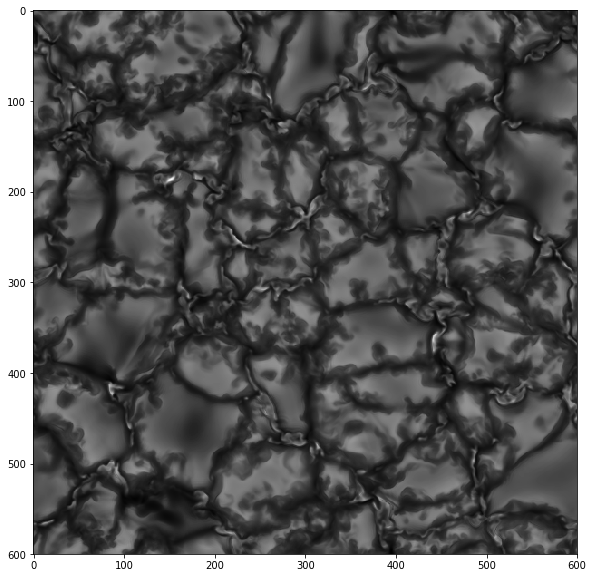

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
ax.imshow(data,cmap='gray')

## This is a synthesized brightness image of a quiet sun target, so it has a pefect spatial resolution. Let us degrade it a bit to mimic actual data


In [5]:
from scipy.ndimage.filters import gaussian_filter as gf

In [6]:
def Sigma(FWHM_arcsec, pixel_size):
    
    FWHM_pixels = FWHM_arcsec /pixel_size
    Sigma = FWHM_pixels /(2*np.sqrt(2*np.log(2)))
    return Sigma


In [17]:
data_deg = gf(data,sigma=Sigma(0.23,0.1),mode='nearest')

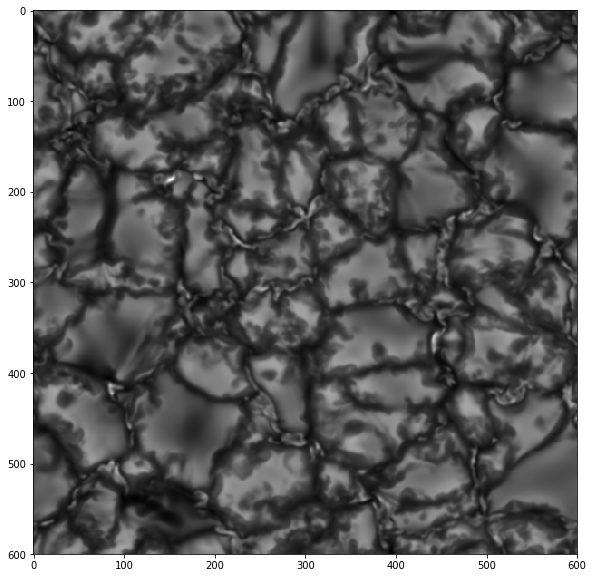

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
ax.imshow(data_deg,cmap='gray')

# The idea is simple, we know that in the Fourier transform image, pixels away from the center correspond to high spatial frequncey (small-scale features), so when we enlarge the FT of an image, we are adding higher spatial frequency components and therefore enhacing the resolution.

In [23]:
w_in, h_in = data.shape
w = h = 2*w_in
## FFTing the image
a = np.fft.fft2(data_deg)
a = np.fft.fftshift(a)
## embeding in a larger array
b = np.zeros((h,w),dtype=complex)
b[(h-h_in)/2:(h+h_in)/2,(w-w_in)/2:(w+w_in)/2] = a 
## iFFT
b = np.fft.ifftshift(b)
b = np.fft.ifft2(b)
data_resamp = np.abs(b)


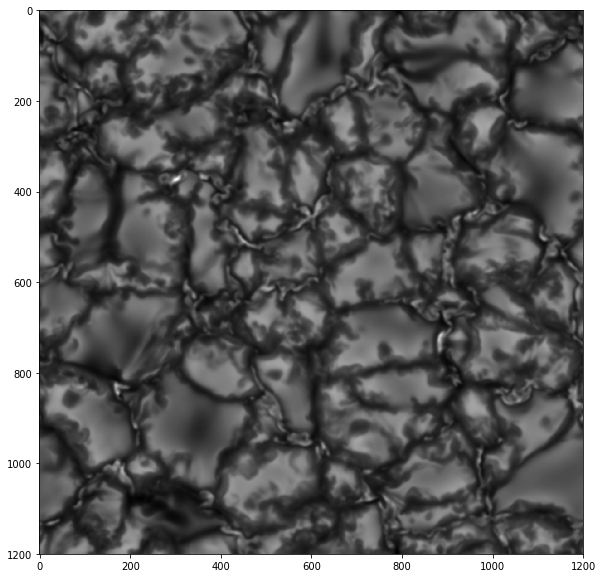

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
ax.imshow(data_resamp,cmap='gray')


# This is a simple mathematical proof on why we have finer sampling after this procedure:
   ## Let's suppose that the sampling of the image (of dimensions $N_1 \times N_1$) was $\Delta s$. After FFT the sampling becomes according to the sampling theory $$\frac{1}{N_1\times \Delta s}$$. After embeding the image in a larger array of dimension $N_2$ and iFFTing, the sampling becomes: $$\Delta s \times \frac{N_1}{N_2}$$ which is smaller than $\Delta s$ since $N_1/N_2 < 1$